In [1]:
import pandas as pd

# Load sample data
data = {
    "Date": ["2023-01-01", "2023-01-02", "2023-01-03"],
    "Close": [150.5, 152.3, 148.7],
    "Volume": [1000, 1500, 1200]
}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime object so datetime functions can be used
print(df)


        Date  Close  Volume
0 2023-01-01  150.5    1000
1 2023-01-02  152.3    1500
2 2023-01-03  148.7    1200


In [2]:
# Calculate daily returns
# new col Daily Return stores percent change of close
df['Daily_Return'] = df['Close'].pct_change()
print("Daily Returns:\n", df[['Date', 'Daily_Return']])

# Filter data to find days with high volume
# creates new df with only rows with volume above 1200
high_volume_days = df[df['Volume'] > 1200]
print("High Volume Days:\n", high_volume_days)


Daily Returns:
         Date  Daily_Return
0 2023-01-01           NaN
1 2023-01-02      0.011960
2 2023-01-03     -0.023638
High Volume Days:
         Date  Close  Volume  Daily_Return
1 2023-01-02  152.3    1500       0.01196


In [3]:
import numpy as np

# Calculate mean and standard deviation of closing prices
# converts close columns into an array
close_prices = np.array(df['Close'])
mean_price = np.mean(close_prices)
std_dev_price = np.std(close_prices)
print("Mean Price:", mean_price, "Standard Deviation:", std_dev_price)


Mean Price: 150.5 Standard Deviation: 1.4696938456699162


In [63]:
%pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical data for a stock (e.g., Apple - AAPL)
# we want data for AAPL
ticker = "AAPL"
# downloads historic stock data for the specified ticker from start to end stored as a pandas df
stock_data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
print(stock_data.head())  # Display the first few rows of the data


In [79]:
# Forward fill missing values in case there are any NaN entries
# fillna is a function in pandas to fill NaN with last non missing value. inplace=True so it modifies og df and doesnt create a new one
stock_data.fillna(method='ffill', inplace=True)
print(stock_data.describe())


Price    Adj Close       Close        High         Low        Open  \
Ticker        AAPL        AAPL        AAPL        AAPL        AAPL   
count   250.000000  250.000000  250.000000  250.000000  250.000000   
mean    171.470441  172.549000  173.857520  170.981880  172.256681   
std      17.437952   17.331672   17.261055   17.535099   17.530359   
min     123.855087  125.019997  127.769997  124.169998  126.010002   
25%     160.847179  162.112499  162.387501  160.699997  161.555000   
50%     174.581657  175.475006  177.025002  173.840004  175.244995   
75%     186.470272  187.330002  188.095001  185.174995  186.805000   
max     197.361084  198.110001  199.619995  197.000000  198.020004   

Price         Volume  
Ticker          AAPL  
count   2.500000e+02  
mean    5.921703e+07  
std     1.777392e+07  
min     2.404830e+07  
25%     4.781208e+07  
50%     5.507750e+07  
75%     6.574292e+07  
max     1.543573e+08  


In [66]:
# Calculate statistics for the closing price
mean_price = stock_data['Close'].mean()
variance_price = stock_data['Close'].var()
std_dev_price = stock_data['Close'].std()

print(f"Mean: {mean_price}, Variance: {variance_price}, Standard Deviation: {std_dev_price}")


Mean: Ticker
AAPL    172.549
dtype: float64, Variance: Ticker
AAPL    300.386854
dtype: float64, Standard Deviation: Ticker
AAPL    17.331672
dtype: float64


In [67]:
# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()

# Display the daily returns
print(stock_data[['Adj Close', 'Daily_Return']].head())


Price                       Adj Close Daily_Return
Ticker                           AAPL             
Date                                              
2023-01-03 00:00:00+00:00  123.904625          NaN
2023-01-04 00:00:00+00:00  125.182610     0.010314
2023-01-05 00:00:00+00:00  123.855087    -0.010605
2023-01-06 00:00:00+00:00  128.412247     0.036794
2023-01-09 00:00:00+00:00  128.937302     0.004089


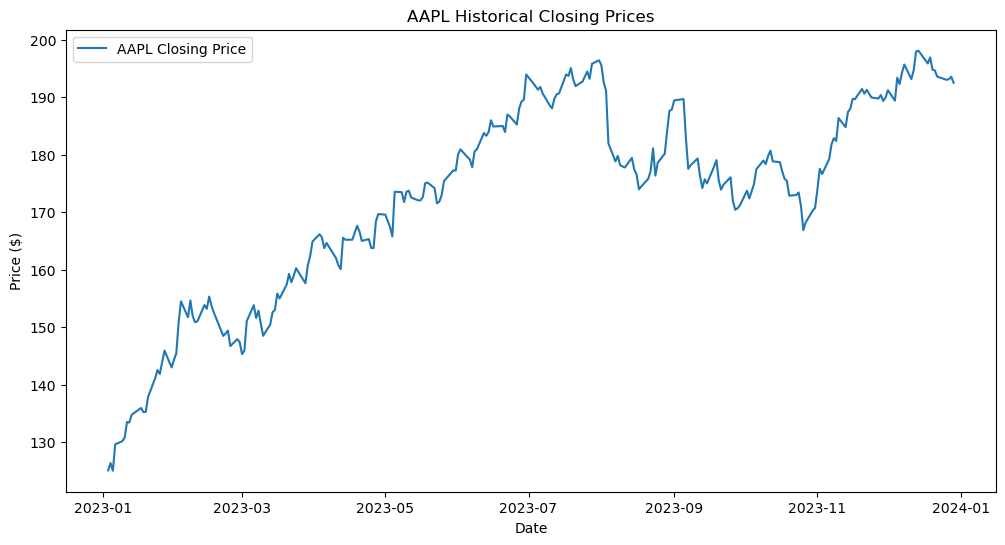

In [68]:
# Plot historical closing prices
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label=f"{ticker} Closing Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title(f"{ticker} Historical Closing Prices")
plt.legend()
plt.show()


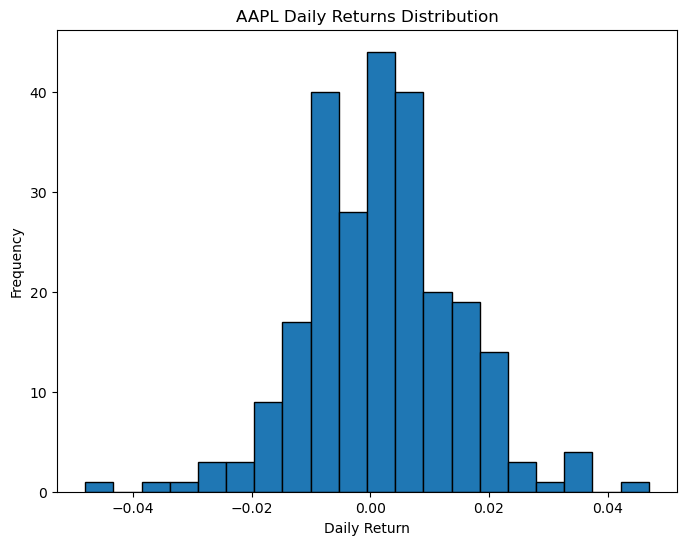

In [69]:
# Plot histogram of daily returns
plt.figure(figsize=(8, 6))
plt.hist(stock_data['Daily_Return'].dropna(), bins=20, edgecolor="black")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.title(f"{ticker} Daily Returns Distribution")
plt.show()


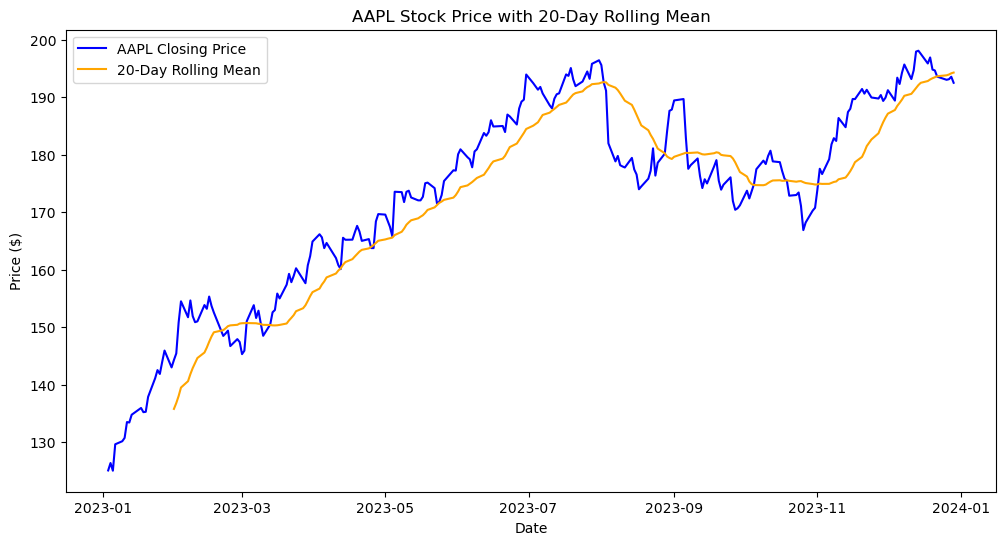

In [70]:
# Calculate 20-day rolling mean
stock_data['Rolling_Mean'] = stock_data['Close'].rolling(window=20).mean()

# Plot closing prices with 20-day rolling mean
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label=f"{ticker} Closing Price", color="blue")
plt.plot(stock_data.index, stock_data['Rolling_Mean'], label="20-Day Rolling Mean", color="orange")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title(f"{ticker} Stock Price with 20-Day Rolling Mean")
plt.legend()
plt.show()
